**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Reddit](#toc2_)    
  - 2.1. [Load the data](#toc2_1_)    
  - 2.2. [Inspect the Data](#toc2_2_)    
  - 2.3. [Missing values](#toc2_3_)    
  - 2.4. [Invalid Data](#toc2_4_)    
  - 2.5. [Data Preparation](#toc2_5_)    
  - 2.6. [Data Exploration](#toc2_6_)    
  - 2.7. [Data Visualization](#toc2_7_)    
    - 2.7.1. [Text Length Analysis](#toc2_7_1_)    
    - 2.7.2. [Word Clouds](#toc2_7_2_)    
- 3. [Twitter](#toc3_)    
- 4. [News](#toc4_)    
- 5. [Combine Data](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>[Setup](#toc0_)

.\venv\Scripts\activate

pip freeze > requirements.txt

In [229]:
import pandas as pd
import praw
import prawcore.exceptions
import datetime
import pandas as pd
import requests as req
import warnings
# warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# Download NLTK resources if not already downloaded
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sohmt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sohmt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# 2. <a id='toc2_'></a>[Reddit](#toc0_)

Based on previous observations in Scrape_RedditPosts.ipynb, out of all methods, let us go forward with **Scraping from different Subreddits.**

## 2.1. <a id='toc2_1_'></a>[Load the data](#toc0_)

In [145]:
# Script to scrape Reddit posts related to all stocks from different subreddits

# Initialize the Reddit API client
reddit = praw.Reddit(
    client_id="2aV6_rxA1c44CoHtxY6e0A",
    client_secret="7rbu00bmyQOlnHCu-xjyTa-U5har-g",
    user_agent="Project Capstone"
)

# list of subreddits to search
subreddits_to_search = ['stocks', 'investing', 'wallstreetbets', 'finance', 'economy', 'stockmarket', 'business']

# list of search queries
search_queries = ['Apple Stocks OR AAPL', 'Google Stocks OR GOOG', 'Netflix Stocks OR NFLX', 'TESLA Stocks OR TSLA', 'Microsoft Stocks OR MSFT']

# Define the date range (January 1, 2015, to December 31, 2020) for consistency
start_date = datetime.date(2015, 1, 1)
end_date = datetime.date(2020, 12, 31)

# lists to store data
titles = []
authors = []
scores = []
urls = []
contents = []
post_dates = []
subreddit_names = []
query_names = []

# Iterate through each subreddit
for subreddit_name in subreddits_to_search:
    for search_query in search_queries:
        try:
            subreddit = reddit.subreddit(subreddit_name)
            posts = subreddit.search(search_query, limit=None)

            # Iterate through the search results and collect data
            for post in posts:
                post_date = pd.to_datetime(post.created_utc, unit='s').date()
                if start_date <= post_date <= end_date:
                    if post.selftext:  # Check if the post has text content
                        titles.append(post.title)
                        authors.append(post.author)
                        scores.append(post.score)
                        urls.append(post.url)
                        contents.append(post.selftext)
                        post_dates.append(pd.to_datetime(post.created_utc, unit='s'))
                        subreddit_names.append(subreddit_name)
                        query_names.append(search_query[-4:])

        # handle the exceptions
        except prawcore.exceptions.NotFound as e:
            print(f"Error in subreddit '{subreddit_to_search}': {e}")
        except prawcore.exceptions.Forbidden as e:
            print(f"Access forbidden in subreddit '{subreddit_to_search}': {e}")
        except praw.exceptions.APIException as e:
            print(f"API Error: {e}")
            # Wait for a while before retrying (e.g., 5 seconds)
            time.sleep(5)

# Create a DataFrame from the collected data
data = {
    'Stock': query_names,
    'Subreddit': subreddit_names,
    'Title': titles,
    'Author': authors,
    'Score': scores,
    'URL': urls,
    'Content': contents,
    'Date': post_dates,
}
df = pd.DataFrame(data)

# drop duplicate
df = df.drop_duplicates(subset='URL')

# Sort by date
df = df.sort_values(by='Date')

# Store as csv file
df.to_csv('Data\RedditPosts.csv')

In [198]:
df_reddit = pd.read_csv('Data/RedditPosts.csv')

## 2.2. <a id='toc2_2_'></a>[Inspect the Data](#toc0_)

In [199]:
df_reddit

,Unnamed: 0,Stock,Subreddit,Title,Author,Score,URL,Content,Date
0,885,MSFT,investing,What is the ONE stock you are most excited abo...,Iama_tomhanks,196,https://www.reddit.com/r/investing/comments/2s...,"No judging, you dicks.",2015-01-11 16:42:11
1,652,NFLX,investing,NFLX: Buy/Hold/Sell thoughts?,TRA8324,0,https://www.reddit.com/r/investing/comments/2s...,"domestic growth is definitely slowing, but can...",2015-01-12 20:48:03
2,1290,GOOG,finance,Anyone have the marketing/press documents ISIS...,Warhawk_1,3,https://www.reddit.com/r/finance/comments/2sgr...,"Was a doc 80-120 pages long, think it was for ...",2015-01-15 01:02:27
3,377,AAPL,investing,http://www.gurufocus.com/stock/AAPL,Novast,0,https://www.reddit.com/r/investing/comments/2s...,I am new to investing in stocks and so far hav...,2015-01-15 15:24:00
4,1306,TSLA,finance,"Tesla will not be profitable, under generally ...",chocolateolive,90,https://www.reddit.com/r/finance/comments/2sm1...,"in the WSJ, Musk said he ""doesn't expect Tesla...",2015-01-16 08:37:12
...,...,...,...,...,...,...,...,...,...
1576,201,TSLA,stocks,"Tesla Will Hit 500,000 Deliveries for 2020, An...",coolcomfort123,1623,https://www.reddit.com/r/stocks/comments/kn48j...,https://www.thestreet.com/investing/tesla-tsla...,2020-12-30 15:29:29
1577,1329,GOOG,economy,"What do you think, could tesla stock collapse ...",jumplineg,0,https://www.reddit.com/r/economy/comments/knlf...,&#x200B;\n\nhttps://preview.redd.it/zuju24i54h...,2020-12-31 07:20:47
1578,205,TSLA,stocks,Tesla Short Sellers Lost $38 Billion in 2020 a...,coolcomfort123,2498,https://www.reddit.com/r/stocks/comments/knqco...,https://www.bloombergquint.com/business/tesla-...,2020-12-31 13:52:20
1579,958,AAPL,wallstreetbets,AAPL is the 2021 Play,thinkclay,88,https://www.reddit.com/r/wallstreetbets/commen...,"Missed out on the TSLA run in 2020? Aww, that’...",2020-12-31 17:11:40


In [200]:
df_reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1581 non-null   int64 
 1   Stock       1581 non-null   object
 2   Subreddit   1581 non-null   object
 3   Title       1581 non-null   object
 4   Author      1581 non-null   object
 5   Score       1581 non-null   int64 
 6   URL         1581 non-null   object
 7   Content     1581 non-null   object
 8   Date        1581 non-null   object
dtypes: int64(2), object(7)
memory usage: 111.3+ KB


We can drop 'Unnamed: 0' column as it holds no information.

Check for statistics for 'Score' column.

'Post_Date' can be converted to DateTime datatype.

## 2.3. <a id='toc2_3_'></a>[Missing values](#toc0_)

In [201]:
#check the frequency of null values for all columns
df_reddit.isnull().sum()

Unnamed: 0    0
Stock         0
Subreddit     0
Title         0
Author        0
Score         0
URL           0
Content       0
Date          0
dtype: int64

In [202]:
#count frequency of missing values
df_reddit.isnull().sum(axis=1).sort_values(ascending=False)

0       0
1062    0
1060    0
1059    0
1058    0
       ..
525     0
524     0
523     0
522     0
1580    0
Length: 1581, dtype: int64

We can observe no missing values.

## 2.4. <a id='toc2_4_'></a>[Invalid Data](#toc0_)

In [203]:
df_reddit.describe()

,Unnamed: 0,Score
count,1581.000000,1581.000000
mean,825.664769,329.632511
std,478.483066,780.757007
min,0.000000,0.000000
25%,412.000000,6.000000
50%,826.000000,45.000000
75%,1234.000000,287.000000
max,1666.000000,10163.000000


Looking at the qauntiles, Q1 is 6, Q2 is 47 and Q3 is 284.

Q3 scores would surely be useful, however we can think of dropping scores below Q1 as they might not be useful and might introduce noise.

## 2.5. <a id='toc2_5_'></a>[Data Preparation](#toc0_)

In [204]:
# drop the specific column
df_reddit.drop(columns='Unnamed: 0', inplace=True)

In [205]:
# Combine columns
df_reddit['Text'] = df_reddit['Title'] + ' ' + df_reddit['Content']

In [206]:
# Select specific columns to consider
selected_columns = ['Date','Text','Stock']
df_reddit = df_reddit[selected_columns]

In [207]:
# Convert to suitable datatype
df_reddit.loc[:, 'Date'] = pd.to_datetime(df_reddit['Date']).dt.date

In [208]:
# Define a function to clean and preprocess text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # Tokenization
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Rejoin the tokens to form cleaned text
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

# Apply the clean_text function to 'Title' and 'Content' columns using lambda
df_reddit.loc[:, 'Cleaned_Text'] = df_reddit['Text'].apply(lambda x: clean_text(x))


C:\Users\sohmt\AppData\Local\Temp\ipykernel_7844\4027975757.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reddit.loc[:, 'Cleaned_Text'] = df_reddit['Text'].apply(lambda x: clean_text(x))


In [209]:
df_reddit

,Date,Text,Stock,Cleaned_Text
0,2015-01-11,What is the ONE stock you are most excited abo...,MSFT,one stock excited right timeline one stock jud...
1,2015-01-12,NFLX: Buy/Hold/Sell thoughts? domestic growth ...,NFLX,nflx buyholdsell thought domestic growth defin...
2,2015-01-15,Anyone have the marketing/press documents ISIS...,GOOG,anyone marketingpress document isi islamic sta...
3,2015-01-15,http://www.gurufocus.com/stock/AAPL I am new t...,AAPL,httpwwwgurufocuscomstockaapl new investing sto...
4,2015-01-16,"Tesla will not be profitable, under generally ...",TSLA,tesla profitable generally accepted accounting...
...,...,...,...,...
1576,2020-12-30,"Tesla Will Hit 500,000 Deliveries for 2020, An...",TSLA,tesla hit 500000 delivery 2020 analyst predict...
1577,2020-12-31,"What do you think, could tesla stock collapse ...",GOOG,think could tesla stock collapse bring new mar...
1578,2020-12-31,Tesla Short Sellers Lost $38 Billion in 2020 a...,TSLA,tesla short seller lost 38 billion 2020 stock ...
1579,2020-12-31,AAPL is the 2021 Play Missed out on the TSLA r...,AAPL,aapl 2021 play missed tsla run 2020 aww ’ cute...


## 2.6. <a id='toc2_6_'></a>[Data Exploration](#toc0_)

In [210]:
# Counts of Posts per stock
df_reddit['Stock'].value_counts()

Stock
NFLX    419
MSFT    323
AAPL    321
TSLA    288
GOOG    230
Name: count, dtype: int64

We have around 300 posts for each of the companies across 6 years 2015-2020

In [211]:
# Group the data by year and count the number of posts in each year for specified stocks
pd.to_datetime(df_reddit[df_reddit['Stock']=='AAPL']['Date']).dt.year.value_counts().sort_index()

Date
2015     29
2016     20
2017     16
2018     29
2019     44
2020    183
Name: count, dtype: int64

~20 posts per year for a stock.

More no. of posts after year 2020 for a stock: On average, there are >100 posts after year 2020.

## 2.7. <a id='toc2_7_'></a>[Data Visualization](#toc0_)

### 2.7.1. <a id='toc2_7_1_'></a>[Text Length Analysis](#toc0_)

Basic Statistics:
count     1581.000000
mean      1082.514231
std       1968.870339
min         38.000000
25%        306.000000
50%        518.000000
75%       1009.000000
max      24079.000000
Name: Text Length, dtype: float64


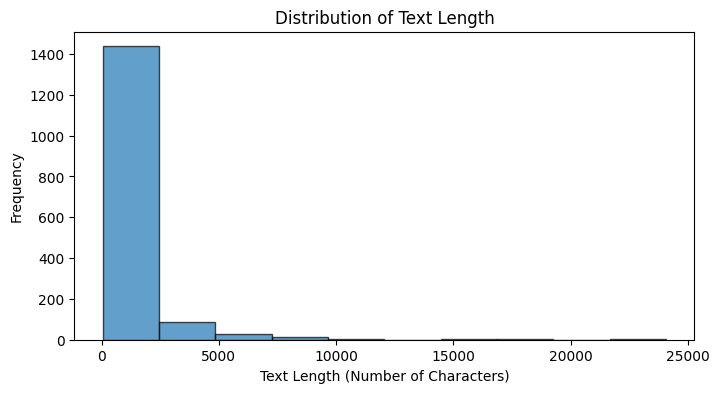

In [215]:
# Calculate the text length (number of characters) for each row
df_reddit.loc[:,'Text Length'] = df_reddit['Text'].apply(len)

# Print basic statistics
print("Basic Statistics:")
print(df_reddit['Text Length'].describe())

# Plot a histogram of text lengths
plt.figure(figsize=(8, 4))
plt.hist(df_reddit['Text Length'], bins=10, edgecolor='k', alpha=0.7)
plt.xlabel("Text Length (Number of Characters)")
plt.ylabel("Frequency")
plt.title("Distribution of Text Length")
plt.show()

### 2.7.2. <a id='toc2_7_2_'></a>[Word Clouds](#toc0_)

In [235]:
def generate_word_cloud(df, column):
    # Combine all text from the 'Text' column into a single string
    text = " ".join(df[column])

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud")
    plt.show()

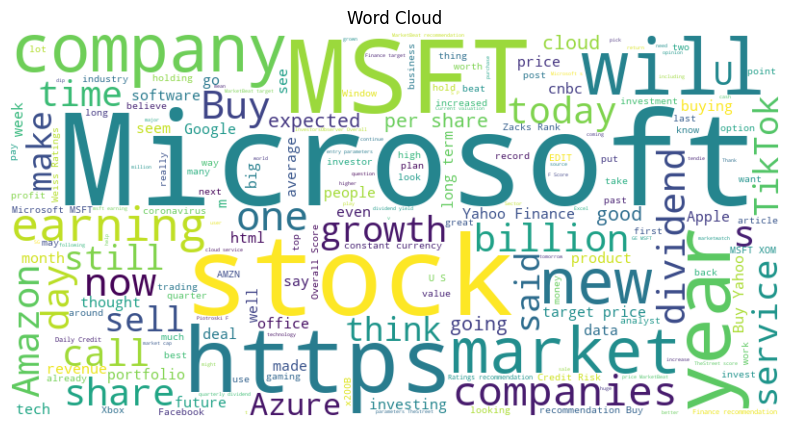

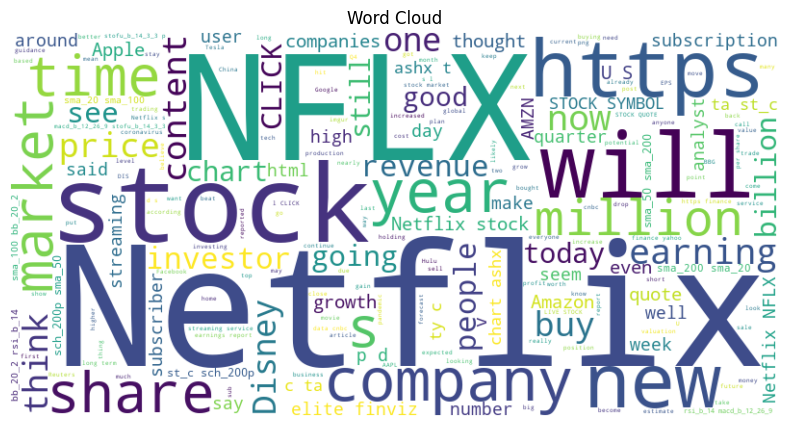

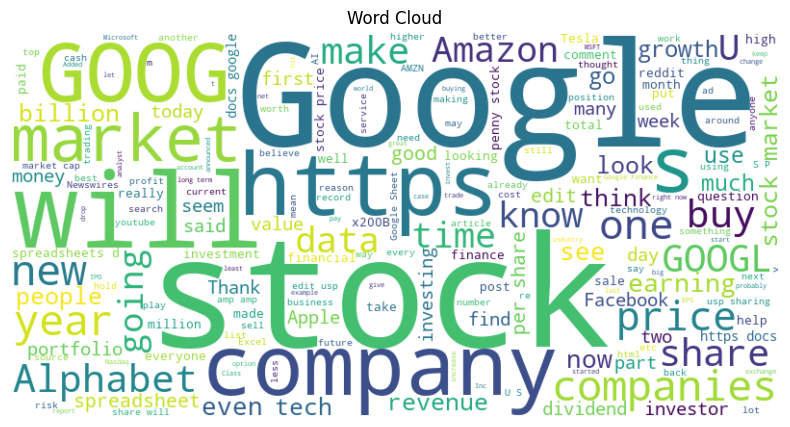

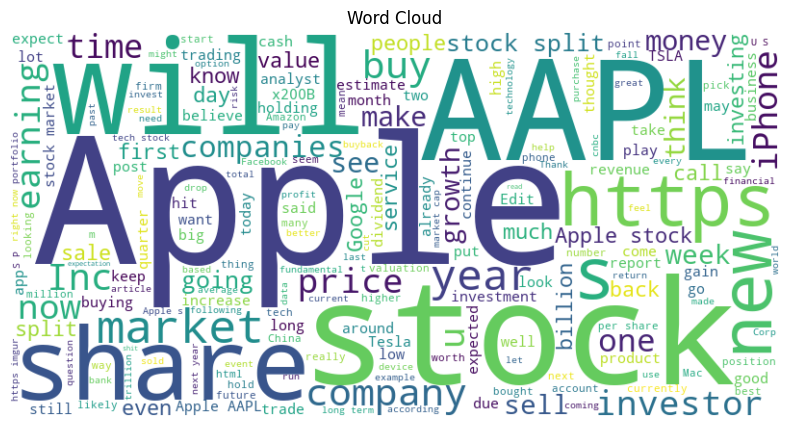

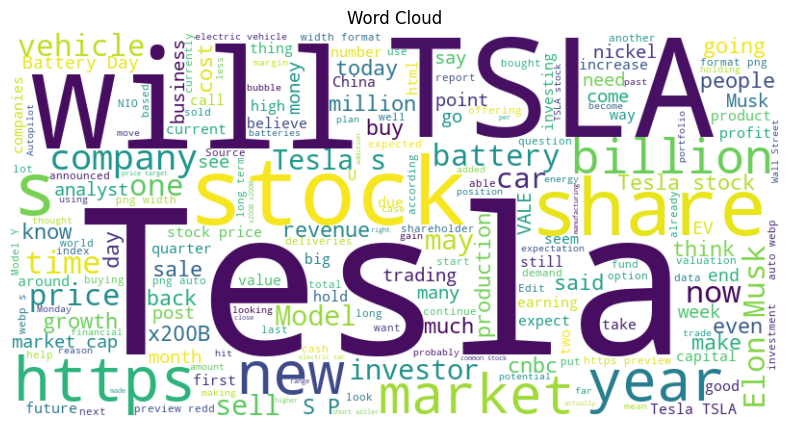

In [236]:
# Uncleaned Text
for i in df_reddit['Stock'].unique(): 
    generate_word_cloud(df_reddit[df_reddit['Stock']==i], 'Text')

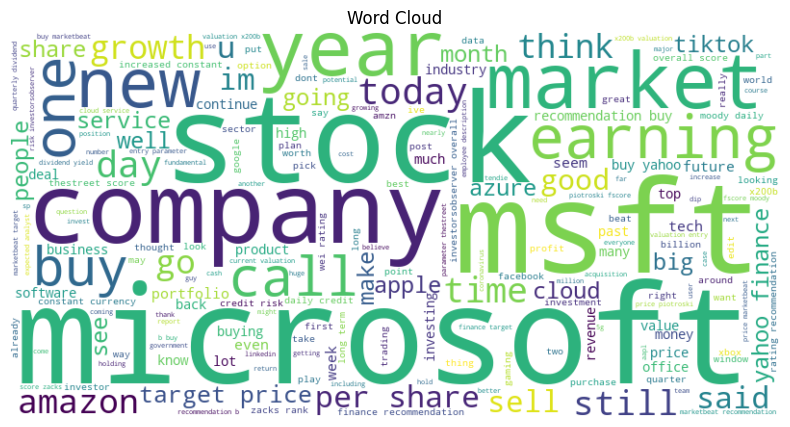

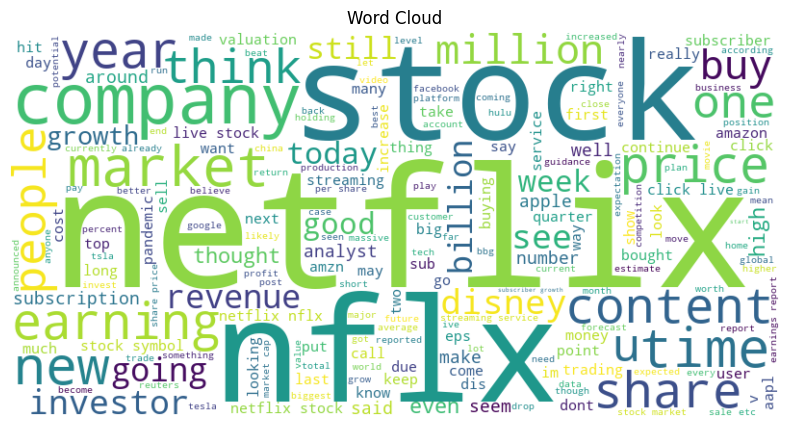

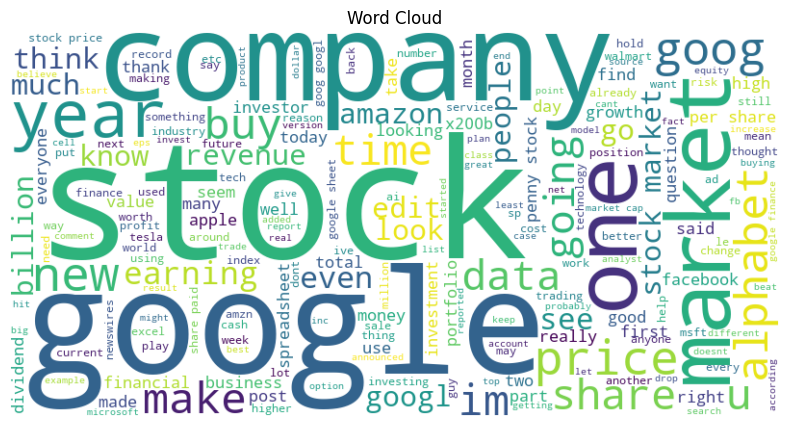

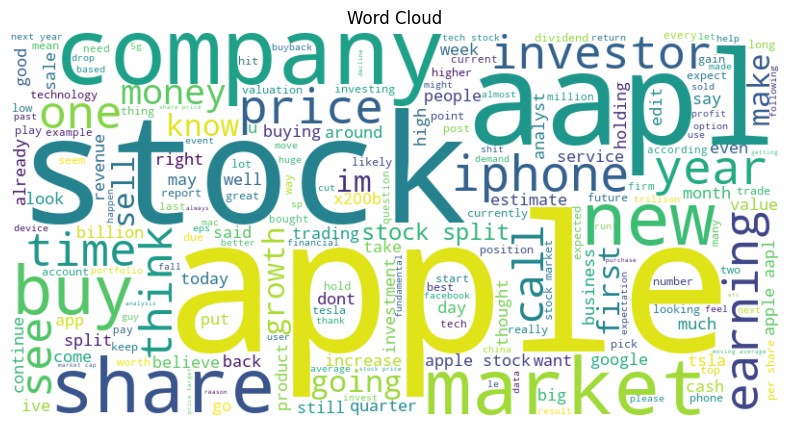

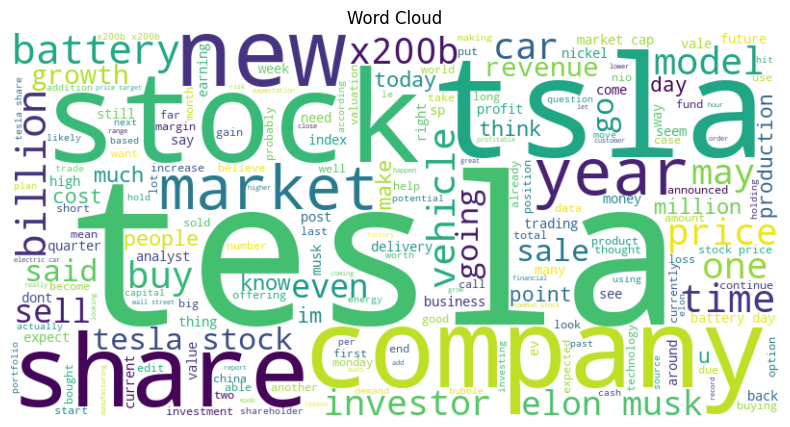

In [238]:
# Cleaned Text
for i in df_reddit['Stock'].unique(): 
    generate_word_cloud(df_reddit[df_reddit['Stock']==i], 'Cleaned_Text')

# 3. <a id='toc3_'></a>[Twitter](#toc0_)

In [40]:
# load the data
tweet_df = pd.read_csv("Data/Tweet.csv")
company_tweet_df = pd.read_csv("Data/Company_Tweet.csv")

# Merge dataset by tweet_id to get which tweet corresponds to which ticker
tweet_company_merge = pd.merge(tweet_df,company_tweet_df,on='tweet_id',how='inner')

# Changing Google's 2 tickers to - GOOGL
tweet_company_merge.loc[tweet_company_merge['ticker_symbol'] == 'GOOGL', 'ticker_symbol'] = 'GOOG'

# Date to correct format
tweet_company_merge['post_date'] = pd.to_datetime(tweet_company_merge['post_date'], unit='s')

# Separate date and time
tweet_company_merge['date'] = tweet_company_merge['post_date'].dt.date
tweet_company_merge['time'] = tweet_company_merge['post_date'].dt.time

df_twitter = tweet_company_merge
df_twitter

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,date,time
0,550441509175443456,VisualStockRSRC,2015-01-01 00:00:57,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,2015-01-01,00:00:57
1,550441672312512512,KeralaGuy77,2015-01-01 00:01:36,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,2015-01-01,00:01:36
2,550441732014223360,DozenStocks,2015-01-01 00:01:50,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,2015-01-01,00:01:50
3,550442977802207232,ShowDreamCar,2015-01-01 00:06:47,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,2015-01-01,00:06:47
4,550443807834402816,i_Know_First,2015-01-01 00:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01,00:10:05
...,...,...,...,...,...,...,...,...,...,...
4336440,1212159838882533376,ShortingIsFun,2019-12-31 23:53:21,In 2020 I may start Tweeting out positive news...,0,0,1,TSLA,2019-12-31,23:53:21
4336441,1212160015332728833,Commuternyc,2019-12-31 23:54:03,Patiently Waiting for the no twitter sitter tw...,0,0,5,TSLA,2019-12-31,23:54:03
4336442,1212160410692046849,MoriaCrypto,2019-12-31 23:55:37,I don't discriminate. I own both $aapl and $ms...,1,0,1,AAPL,2019-12-31,23:55:37
4336443,1212160410692046849,MoriaCrypto,2019-12-31 23:55:37,I don't discriminate. I own both $aapl and $ms...,1,0,1,MSFT,2019-12-31,23:55:37


There are 4M tweets in total

In [41]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4336445 entries, 0 to 4336444
Data columns (total 10 columns):
 #   Column         Dtype         
---  ------         -----         
 0   tweet_id       int64         
 1   writer         object        
 2   post_date      datetime64[ns]
 3   body           object        
 4   comment_num    int64         
 5   retweet_num    int64         
 6   like_num       int64         
 7   ticker_symbol  object        
 8   date           object        
 9   time           object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 330.8+ MB


In [42]:
df_twitter.isnull().sum()

tweet_id             0
writer           55919
post_date            0
body                 0
comment_num          0
retweet_num          0
like_num             0
ticker_symbol        0
date                 0
time                 0
dtype: int64

"writer" contains 55k missing values out of 4M tweets.

In [43]:
# Counts of tweets per stock
df_twitter['ticker_symbol'].value_counts()

ticker_symbol
AAPL    1425013
TSLA    1096868
GOOG     720138
AMZN     718715
MSFT     375711
Name: count, dtype: int64

~80k tweets for each stock.

In [64]:
# Group the data by year and count the number of posts in each year for specified stocks
pd.to_datetime(df_twitter[df_twitter['ticker_symbol']=='GOOG']['date']).dt.year.value_counts().sort_index()


# Group the data by year and count the number of posts in each year for specified stocks
# pd.to_datetime(df_reddit[df_reddit['Query']=='GOOG']['Post_Date']).dt.year.value_counts().sort_index()

date
2015    195796
2016    186084
2017    120382
2018    117158
2019    100718
Name: count, dtype: int64

~14k tweets per year for a stock

In [67]:
df_twitter.describe()

,tweet_id,post_date,comment_num,retweet_num,like_num
count,4.336445e+06,4336445,4.336445e+06,4.336445e+06,4.336445e+06
mean,8.834282e+17,2017-07-07 20:51:06.490715136,2.923863e-01,6.347647e-01,2.103625e+00
min,5.504415e+17,2015-01-01 00:00:57,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.185450e+17,2016-04-08 21:04:16,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.825934e+17,2017-07-05 13:33:54,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.054776e+18,2018-10-23 16:44:39,0.000000e+00,0.000000e+00,1.000000e+00
max,1.212160e+18,2019-12-31 23:55:53,6.310000e+02,9.990000e+02,9.990000e+02
std,1.927735e+17,NaN,1.885788e+00,6.986371e+00,1.371744e+01



Q3 for number of comments, retweets, likes is < 1. This means that most of the tweets have not been engaged into activities by the users.

# 4. <a id='toc4_'></a>[News](#toc0_)

In [95]:
# load the data
df_analyst_ratings_processed = pd.read_csv("Data/analyst_ratings_processed.csv", encoding='UTF-8')
df_analyst_ratings_processed['stock'] = df_analyst_ratings_processed['stock'].replace(['GOOG', 'GOOGL'], 'GOOG')
df_raw_analyst_ratings = pd.read_csv("Data/raw_analyst_ratings.csv", encoding = 'UTF-8')
df_partner_headlines= pd.read_csv("Data/raw_partner_headlines.csv", encoding = 'UTF-8')


# filter the dataframe to contain values between years 2015-2020
def filter_dataframe (df):
  startdate = pd.to_datetime("2015-01-01").date()
  enddate = pd.to_datetime("2020-12-31").date()
  df['date'] = pd.to_datetime(df['date'], errors='coerce', utc=True)
  df['date'] = df['date'].dt.date
  df = df.loc[(df['date'] >= startdate) & (df['date'] <= enddate)]
  return df

df_analyst_ratings_processed = filter_dataframe(df_analyst_ratings_processed)
df_raw_analyst_ratings = filter_dataframe(df_raw_analyst_ratings)
df_partner_headlines = filter_dataframe(df_partner_headlines)


# filter the dataframe to contain only specific stocks
def get_statistics(df):
  categories_to_check = ['AAPL', 'GOOG','GOOGL', 'AMZN', 'MSFT','TSLA']
  filtered_df = df[df['stock'].isin(categories_to_check)]
  filtered_df['year'] = pd.DatetimeIndex(filtered_df['date']).year
  return filtered_df

df_analyst_ratings_processed = get_statistics(df_analyst_ratings_processed)
df_raw_analyst_ratings = get_statistics(df_raw_analyst_ratings)
df_partner_headlines = get_statistics(df_partner_headlines)

C:\Users\sohmt\AppData\Local\Temp\ipykernel_7844\2718190284.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year'] = pd.DatetimeIndex(filtered_df['date']).year
C:\Users\sohmt\AppData\Local\Temp\ipykernel_7844\2718190284.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year'] = pd.DatetimeIndex(filtered_df['date']).year
C:\Users\sohmt\AppData\Local\Temp\ipykernel_7844\2718190284.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [96]:
df_analyst_ratings_processed

,Unnamed: 0,title,date,stock,year
3668,7120.0,Tech Stocks And FAANGS Strong Again To Start D...,2020-06-10,AAPL,2020
3669,7121.0,10 Biggest Price Target Changes For Wednesday,2020-06-10,AAPL,2020
3670,7122.0,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",2020-06-10,AAPL,2020
3671,7123.0,"Deutsche Bank Maintains Buy on Apple, Raises P...",2020-06-10,AAPL,2020
3672,7124.0,Apple To Let Users Trade In Their Mac Computer...,2020-06-10,AAPL,2020
...,...,...,...,...,...
1250207,1263065.0,Electrek.Co Tweet: Tesla's head of Europe is out,2019-07-02,TSLA,2019
1250208,1263066.0,Tesla's Q2 Delivery Number Could Cause A Big Move,2019-07-01,TSLA,2019
1250209,1263067.0,'Tesla Electric Airplane? Elon Musk sees elect...,2019-07-01,TSLA,2019
1250210,1263068.0,"UPDATE: JMP Reiterates Outperform, $347 Target...",2019-07-01,TSLA,2019


In [97]:
df_raw_analyst_ratings.head()

,Unnamed: 0,headline,url,publisher,date,stock,year
6680,7120,Tech Stocks And FAANGS Strong Again To Start D...,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,2020-06-10,AAPL,2020
6681,7121,10 Biggest Price Target Changes For Wednesday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-06-10,AAPL,2020
6682,7122,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",https://www.benzinga.com/short-sellers/20/06/1...,Benzinga Newsdesk,2020-06-10,AAPL,2020
6683,7123,"Deutsche Bank Maintains Buy on Apple, Raises P...",https://www.benzinga.com/news/20/06/16219873/d...,Benzinga Newsdesk,2020-06-10,AAPL,2020
6684,7124,Apple To Let Users Trade In Their Mac Computer...,https://www.benzinga.com/news/20/06/16218697/a...,Neer Varshney,2020-06-10,AAPL,2020


In [98]:
df_partner_headlines

,Unnamed: 0,headline,url,publisher,date,stock,year
4067,4130,American Pie,https://talkmarkets.com/content/american-pie?p...,TalkMarkets,2020-06-02,AAPL,2020
4068,4131,Tech Giants Dare Antitrust Deal Watchdogs,https://talkmarkets.com/content/tech-giants-da...,TalkMarkets,2020-06-02,AAPL,2020
4069,4132,MoneyGram Shares Jump 50% As Western Union Rep...,https://talkmarkets.com/content/moneygram-shar...,TalkMarkets,2020-06-02,AAPL,2020
4070,4133,All Eyes on Market Volatility,https://talkmarkets.com/content/all-eyes-on-ma...,TalkMarkets,2020-06-01,AAPL,2020
4071,4134,Warren Buffett's Berkshire Hathaway Turns Up S...,http://www.gurufocus.com/news/1152965/warren-b...,GuruFocus,2020-06-01,AAPL,2020
...,...,...,...,...,...,...,...
715202,716897,"Fundamentun, LLC Buys WisdomTree U.S. Dividend...",http://www.gurufocus.com/news/1125032/fundamen...,GuruFocus,2020-05-04,GOOGL,2020
715203,716898,"The Zacks Analyst Blog Highlights: Microsoft, ...",http://www.zacks.com/stock/news/912835/the-zac...,Zacks,2020-05-04,GOOGL,2020
715204,716899,Zacks Investment Ideas feature highlights: Goo...,http://www.zacks.com/stock/news/912746/zacks-i...,Zacks,2020-05-04,GOOGL,2020
715205,716900,BT Investment Management Ltd Buys Atmos Energy...,http://www.gurufocus.com/news/1124838/bt-inves...,GuruFocus,2020-05-04,GOOGL,2020


Number of rows in the df_analytics: 5523

Number of rows in the df_analyst_rating: 50

Number of rows in the df_partner_headlines: 212

In [99]:
df_news = df_analyst_ratings_processed

In [100]:
# drop the specific column
df_news.drop(columns='Unnamed: 0', inplace=True)

In [106]:
df_news.info()
df_news['date'] = pd.to_datetime(df_news['date'])

<class 'pandas.core.frame.DataFrame'>
Index: 5523 entries, 3668 to 1250211
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   5523 non-null   object
 1   date    5523 non-null   object
 2   stock   5523 non-null   object
 3   year    5523 non-null   int32 
dtypes: int32(1), object(3)
memory usage: 194.2+ KB


In [107]:
df_news.describe()

,date,year
count,5523,5523.000000
mean,2019-11-24 20:43:24.671374336,2019.475647
min,2018-07-25 00:00:00,2018.000000
25%,2019-08-08 00:00:00,2019.000000
50%,2020-01-21 00:00:00,2020.000000
75%,2020-04-13 00:00:00,2020.000000
max,2020-06-10 00:00:00,2020.000000
std,NaN,0.611296


In [102]:
df_news['stock'].value_counts()

stock
GOOG    2794
TSLA    1930
AAPL     469
AMZN     330
Name: count, dtype: int64

~400 posts for AAPL and AMZN with ~2000 posts for GOOG, TSLA.

This is because the start date is July2018 and the end date is June2020.

In [112]:
# Group the data by year and count the number of posts in each year for specified stocks
print(pd.to_datetime(df_news[df_news['stock']=='GOOG']['date']).dt.year.value_counts().sort_index())

print(pd.to_datetime(df_news[df_news['stock']=='TSLA']['date']).dt.year.value_counts().sort_index())

print(pd.to_datetime(df_news[df_news['stock']=='AAPL']['date']).dt.year.value_counts().sort_index())

print(pd.to_datetime(df_news[df_news['stock']=='AMZN']['date']).dt.year.value_counts().sort_index())

date
2018     343
2019    1477
2020     974
Name: count, dtype: int64
date
2019     733
2020    1197
Name: count, dtype: int64
date
2020    469
Name: count, dtype: int64
date
2020    330
Name: count, dtype: int64


The posts are inconsistently spread across years. This possesses a problem.

# 5. <a id='toc5_'></a>[Combine Data](#toc0_)

In [65]:
df_reddit

,Query,Subreddit,Title,Author,Score,URL,Content,Post_Date
0,MSFT,investing,What is the ONE stock you are most excited abo...,Iama_tomhanks,197,https://www.reddit.com/r/investing/comments/2s...,"No judging, you dicks.",2015-01-11 16:42:11
1,NFLX,investing,NFLX: Buy/Hold/Sell thoughts?,TRA8324,0,https://www.reddit.com/r/investing/comments/2s...,"domestic growth is definitely slowing, but can...",2015-01-12 20:48:03
2,GOOG,finance,Anyone have the marketing/press documents ISIS...,Warhawk_1,7,https://www.reddit.com/r/finance/comments/2sgr...,"Was a doc 80-120 pages long, think it was for ...",2015-01-15 01:02:27
3,AAPL,investing,http://www.gurufocus.com/stock/AAPL,Novast,0,https://www.reddit.com/r/investing/comments/2s...,I am new to investing in stocks and so far hav...,2015-01-15 15:24:00
4,TSLA,finance,"Tesla will not be profitable, under generally ...",chocolateolive,85,https://www.reddit.com/r/finance/comments/2sm1...,"in the WSJ, Musk said he ""doesn't expect Tesla...",2015-01-16 08:37:12
...,...,...,...,...,...,...,...,...
1574,TSLA,stocks,"Tesla Will Hit 500,000 Deliveries for 2020, An...",coolcomfort123,1620,https://www.reddit.com/r/stocks/comments/kn48j...,https://www.thestreet.com/investing/tesla-tsla...,2020-12-30 15:29:29
1575,GOOG,economy,"What do you think, could tesla stock collapse ...",jumplineg,0,https://www.reddit.com/r/economy/comments/knlf...,&#x200B;\n\nhttps://preview.redd.it/zuju24i54h...,2020-12-31 07:20:47
1576,TSLA,stocks,Tesla Short Sellers Lost $38 Billion in 2020 a...,coolcomfort123,2498,https://www.reddit.com/r/stocks/comments/knqco...,https://www.bloombergquint.com/business/tesla-...,2020-12-31 13:52:20
1577,AAPL,wallstreetbets,AAPL is the 2021 Play,thinkclay,87,https://www.reddit.com/r/wallstreetbets/commen...,"Missed out on the TSLA run in 2020? Aww, that’...",2020-12-31 17:11:40


In [66]:
df_twitter

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,date,time
0,550441509175443456,VisualStockRSRC,2015-01-01 00:00:57,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,2015-01-01,00:00:57
1,550441672312512512,KeralaGuy77,2015-01-01 00:01:36,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,2015-01-01,00:01:36
2,550441732014223360,DozenStocks,2015-01-01 00:01:50,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,2015-01-01,00:01:50
3,550442977802207232,ShowDreamCar,2015-01-01 00:06:47,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,2015-01-01,00:06:47
4,550443807834402816,i_Know_First,2015-01-01 00:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01,00:10:05
...,...,...,...,...,...,...,...,...,...,...
4336440,1212159838882533376,ShortingIsFun,2019-12-31 23:53:21,In 2020 I may start Tweeting out positive news...,0,0,1,TSLA,2019-12-31,23:53:21
4336441,1212160015332728833,Commuternyc,2019-12-31 23:54:03,Patiently Waiting for the no twitter sitter tw...,0,0,5,TSLA,2019-12-31,23:54:03
4336442,1212160410692046849,MoriaCrypto,2019-12-31 23:55:37,I don't discriminate. I own both $aapl and $ms...,1,0,1,AAPL,2019-12-31,23:55:37
4336443,1212160410692046849,MoriaCrypto,2019-12-31 23:55:37,I don't discriminate. I own both $aapl and $ms...,1,0,1,MSFT,2019-12-31,23:55:37
